In [1]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

unable to import 'smart_open.gcs', disabling that module


In [2]:
glove_input = 'glove.6B.100d.txt'
word2vec_output = 'glove.6B.100d.word2vec'
glove2word2vec(glove_input, word2vec_output)

(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_output, binary=False)

In [4]:
model['istanbul']

array([ 0.40378  ,  0.019734 , -0.15499  , -0.26948  ,  0.33938  ,
        0.46476  , -0.53141  ,  0.094519 ,  0.45399  ,  1.3385   ,
        0.18271  , -0.3465   ,  0.28323  ,  0.70829  , -0.75002  ,
        0.016359 , -0.64514  , -0.54882  , -0.75309  , -0.21617  ,
        0.13678  , -0.25198  , -0.037552 ,  0.35938  , -0.33532  ,
       -0.78733  ,  0.10907  , -0.13902  ,  0.53454  ,  0.58805  ,
       -1.1348   , -0.14574  ,  0.20244  ,  0.81909  , -0.27482  ,
        0.14045  ,  0.68814  ,  0.70236  , -0.34211  , -0.62128  ,
       -0.10601  , -0.62413  ,  0.30536  , -0.44325  ,  0.64016  ,
        0.0020673,  0.88252  ,  0.050356 , -0.35739  ,  0.54686  ,
        0.11974  , -0.12593  ,  0.74211  ,  0.65482  , -1.4018   ,
       -1.1218   , -0.21188  ,  0.35338  ,  0.53459  ,  0.20205  ,
       -0.86132  ,  0.82773  , -0.10065  , -0.19766  , -0.85631  ,
        0.27891  , -1.3381   ,  0.19368  , -0.70602  ,  0.067972 ,
       -0.80953  , -0.65974  ,  0.50856  , -0.020009 , -0.7665

In [5]:
model.most_similar('kangaroo')

[('kangaroos', 0.6124688982963562),
 ('squirrel', 0.5469585657119751),
 ('rat', 0.5455619096755981),
 ('mule', 0.5324220061302185),
 ('elephant', 0.5309096574783325),
 ('snake', 0.5248682498931885),
 ('monkey', 0.5218598246574402),
 ('parrot', 0.5193796157836914),
 ('sheep', 0.5146180391311646),
 ('shark', 0.5082205533981323)]

In [13]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [6]:
model.most_similar(positive=['woman', 'son'], negative=['man'], topn=1)

[('daughter', 0.9090957641601562)]

In [14]:
model.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024618864059448)]

In [7]:
model.most_similar(positive=['bangkok', 'germany'], negative=['berlin'], topn=1)

[('thailand', 0.8427271842956543)]

In [8]:
model.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610153555870056)]

In [9]:
# vectors anmatrix
import numpy as np
# visualization of word vectors relationship
from sklearn.manifold import TSNE
# draw graphic
import matplotlib.pyplot as plt

In [10]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


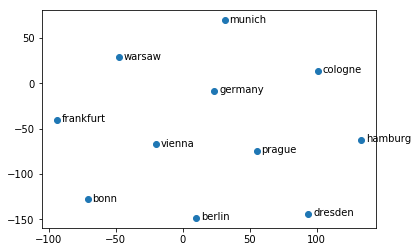

In [12]:
closestwords_tsneplot(model, 'berlin')